In [1]:
import pandas as pd
import numpy as np
import nltk



In [33]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('bricknmortar.csv', sep='\t')

In [4]:
df.tweet[30]

'Happy Black History Month!   #tcvnowspinning #yourfullservicefunprovider #midtownmuskegon #midtownproud #shoplocal #brickandmortar #amazondestroyslocaleconomies  #daysofrona @ Third Coast Vinyl  https://t.co/50ZAR1UPir'

In [20]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', 'e', 'o', 'u']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'brickandmortar', 'brickandmortar ',
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', '@brickandmortar', '#brickandmortar']
sw_set = set(sw_list)

In [21]:
df=df[df.language=='en']

In [22]:
df.tweet[0]


'What Enterprise Decision-Makers Need to Know about the Workplace of the Future -   https://t.co/jdZLCgwiXk #FutureOfWork #Workplace #Innovation #DigitalStrategy #RealEstate #BrickAndMortar #OfficeSpace #BusinessTransformation #Coruzant #CTO #Creston @Crestron'

In [23]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets= [tokenizer.tokenize(x) for x in df.tweet]

In [24]:
tokenized_tweets

[['What',
  'Enterprise',
  'Decision',
  'Makers',
  'Need',
  'to',
  'Know',
  'about',
  'the',
  'Workplace',
  'of',
  'the',
  'Future',
  'https',
  't',
  'co',
  'jdZLCgwiXk',
  'FutureOfWork',
  'Workplace',
  'Innovation',
  'DigitalStrategy',
  'RealEstate',
  'BrickAndMortar',
  'OfficeSpace',
  'BusinessTransformation',
  'Coruzant',
  'CTO',
  'Creston',
  'Crestron'],
 ['Our',
  'oldest',
  'kid',
  'is',
  'back',
  'in',
  'regular',
  'brickandmortar',
  'school',
  'today'],
 ['The',
  'lockdown',
  'has',
  'engendered',
  'a',
  'culture',
  'that',
  'has',
  'made',
  'people',
  'less',
  'wary',
  'of',
  'onlineshopping',
  'quite',
  'to',
  'the',
  'point',
  'of',
  'near',
  'replacement',
  'of',
  'the',
  'brickandmortar',
  'purchase',
  'pandemic',
  'FMCG',
  'startups',
  'https',
  't',
  'co',
  'WKDGDh',
  'Wi'],
 ['Word',
  'spreads',
  'like',
  'wildfire',
  'This',
  'means',
  'you',
  'could',
  'undermine',
  'your',
  'business',
  'if

In [25]:
sw_set

{'!',
 '"',
 '""',
 '#',
 '#brickandmortar',
 '$',
 '%',
 '&',
 "'",
 "''",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '...',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '@brickandmortar',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'brickandmortar',
 'brickandmortar ',
 'but',
 'by',
 'can',
 'com',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'e',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'https',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'i

In [26]:
#filtering for stop words
filtered_tweets=[]
for i in range(len(tokenized_tweets)):
    for word in tokenized_tweets[i]:
        if word not in sw_set:
            filtered_tweets.append(word)

In [27]:
filtered_tweets=[x.lower() for x in filtered_tweets]

In [28]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets=[]
for w in filtered_tweets:
    lemmatized_tweets.append(lemmatizer.lemmatize(w))


In [29]:
word_freq= pd.DataFrame(lemmatized_tweets)
word_freq[0].value_counts().head(50)

co                80274
retail            32550
store             18020
brickandmortar    15329
i                  8891
ecommerce          8222
retailer           7439
amp                7264
new                6741
business           6595
brick              6459
the                6317
online             6188
mortar             5855
via                5498
cre                5119
http               5001
amazon             4769
u                  4163
shopping           3779
sale               3707
customer           3542
retailnews         3398
a                  3345
experience         3246
open               3195
shop               2991
we                 2836
digital            2776
get                2685
see                2623
it                 2618
w                  2611
how                2600
time               2583
brand              2555
marketing          2490
like               2303
b                  2244
v                  2233
consumer           2193
colorado        

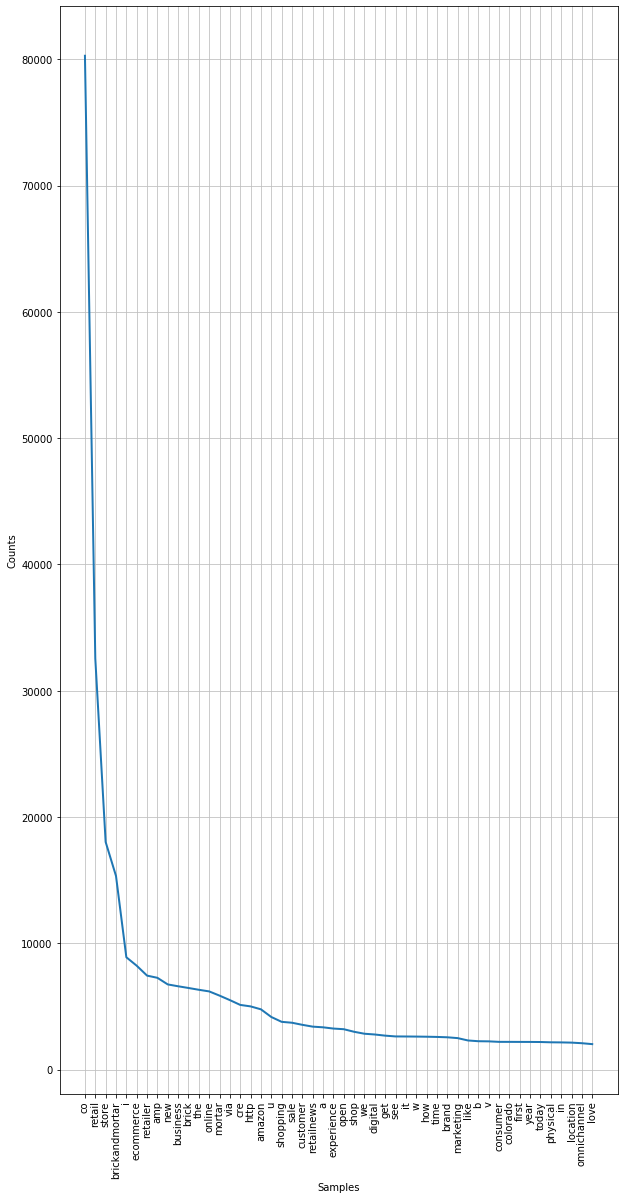

In [34]:
fdist=FreqDist(lemmatized_tweets)
plt.figure(figsize=(10,20))
fdist.plot(50)

In [87]:
#importing the vader sentiment analysis package and instantiating it
data=df
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [88]:
#list comprehension to get scores from tweets using my written function
a= [analyser.polarity_scores(x) for x in data['tweet']]

In [89]:
#pulling the relevant score into a list 
b= [x.items() for x in a]

In [90]:
#creating a dataframe of my vader scores of the tweets
data1=pd.DataFrame(b, columns= ['neg', 'neu', 'pos', 'comp'])

In [91]:
#putting my scores into a column in the dataframe
b = data1['comp']

In [92]:
#making a column that grabs the right compound score to gauge sentiment
data1['comp2']= [score[1] for score in b]

In [93]:
#rounding out my vader score
data1['comp2']= data1['comp2'].round(3)


In [128]:
#converting the vader scores into something easier to manipulate so that I can generate three distinct classes
col         = 'comp2'
conditions  = [ data1[col] >= .150, (data1[col] < .150) & (data1[col]> -.150), data1[col] <= -.150 ]
choices     = [ 1, 0, -1 ]
data1["comp3"] = np.select(conditions, choices, default=np.nan)

In [129]:
data1['comp4']= data1['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [130]:
data=pd.concat([data['tweet'], data1], axis=1)


In [131]:
data.dropna()

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,What Enterprise Decision-Makers Need to Know a...,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
1,Our oldest kid is back in regular #brickandmor...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,The #lockdown has engendered a culture that ha...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
3,Word spreads like wildfire. This means you cou...,"(neg, 0.147)","(neu, 0.696)","(pos, 0.157)","(compound, 0.1027)",0.103,0.0,neutral
4,A little geometric bezel to a classic ring wil...,"(neg, 0.049)","(neu, 0.951)","(pos, 0.0)","(compound, -0.126)",-0.126,0.0,neutral
...,...,...,...,...,...,...,...,...
82519,Why the In-Store Experience Should Be a Top Pr...,"(neg, 0.0)","(neu, 0.855)","(pos, 0.145)","(compound, 0.1779)",0.178,1.0,positive
82520,The #checkout lines in #brickandmortar retaile...,"(neg, 0.0)","(neu, 0.781)","(pos, 0.219)","(compound, 0.7228)",0.723,1.0,positive
82521,Shift towards #Omnichannel #Retailing - #ecomm...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
82522,RT MikeSchiemer: $10 Startup: Traditional Busi...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral


In [132]:
data[data.comp4=='positive']

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,What Enterprise Decision-Makers Need to Know a...,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
5,"Hey, @brickandmortar ever thought about doing ...","(neg, 0.0)","(neu, 0.821)","(pos, 0.179)","(compound, 0.6428)",0.643,1.0,positive
7,"Brick and mortar stores aren’t going away, des...","(neg, 0.0)","(neu, 0.781)","(pos, 0.219)","(compound, 0.8126)",0.813,1.0,positive
9,Our listing in the news! Rosenberg’s Bagels br...,"(neg, 0.0)","(neu, 0.872)","(pos, 0.128)","(compound, 0.4753)",0.475,1.0,positive
10,What Enterprise Decision-Makers Need to Know a...,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
...,...,...,...,...,...,...,...,...
82517,Will #brickandmortar stores #survive? @marksat...,"(neg, 0.0)","(neu, 0.87)","(pos, 0.13)","(compound, 0.4019)",0.402,1.0,positive
82518,82% of #Millennials prefer to shop at #BrickAn...,"(neg, 0.0)","(neu, 0.45)","(pos, 0.55)","(compound, 0.944)",0.944,1.0,positive
82519,Why the In-Store Experience Should Be a Top Pr...,"(neg, 0.0)","(neu, 0.855)","(pos, 0.145)","(compound, 0.1779)",0.178,1.0,positive
82520,The #checkout lines in #brickandmortar retaile...,"(neg, 0.0)","(neu, 0.781)","(pos, 0.219)","(compound, 0.7228)",0.723,1.0,positive


In [133]:
data.tweet[82520]

'The #checkout lines in #brickandmortar retailers are officially longer than 2-day @amazon #amazonprime #Christmas #lastminuteshopping'

In [134]:
data[data.comp4=='negative']

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
31,Today’s adjusted hours. #tryingtoreturntonorm...,"(neg, 0.065)","(neu, 0.935)","(pos, 0.0)","(compound, -0.2732)",-0.273,-1.0,negative
37,@susanorlean THE. BEST. IS. YET. TO. COME!!!!,"(neg, 0.347)","(neu, 0.495)","(pos, 0.158)","(compound, -0.4215)",-0.422,-1.0,negative
54,#vegan #veggie #lenten we've got you covered @...,"(neg, 0.149)","(neu, 0.851)","(pos, 0.0)","(compound, -0.5423)",-0.542,-1.0,negative
57,Eco-friendly Tennyson refill store moving near...,"(neg, 0.187)","(neu, 0.813)","(pos, 0.0)","(compound, -0.5994)",-0.599,-1.0,negative
73,RETAIL STRATEGY | 3D KNITTING MACHINE: Enhance...,"(neg, 0.072)","(neu, 0.85)","(pos, 0.078)","(compound, -0.1751)",-0.175,-1.0,negative
...,...,...,...,...,...,...,...,...
82467,What is it that #startups can learn from ##bri...,"(neg, 0.298)","(neu, 0.702)","(pos, 0.0)","(compound, -0.6868)",-0.687,-1.0,negative
82477,#U.S. #shoppers still prefer #brickandmortar -...,"(neg, 0.36)","(neu, 0.64)","(pos, 0.0)","(compound, -0.5216)",-0.522,-1.0,negative
82491,NaN,"(neg, 0.174)","(neu, 0.826)","(pos, 0.0)","(compound, -0.2263)",-0.226,-1.0,negative
82504,"It's Wed 12/21, open till 6 tonight. Come supp...","(neg, 0.115)","(neu, 0.885)","(pos, 0.0)","(compound, -0.296)",-0.296,-1.0,negative


In [135]:
data[data.comp4=='neutral']

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
1,Our oldest kid is back in regular #brickandmor...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,The #lockdown has engendered a culture that ha...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
3,Word spreads like wildfire. This means you cou...,"(neg, 0.147)","(neu, 0.696)","(pos, 0.157)","(compound, 0.1027)",0.103,0.0,neutral
4,A little geometric bezel to a classic ring wil...,"(neg, 0.049)","(neu, 0.951)","(pos, 0.0)","(compound, -0.126)",-0.126,0.0,neutral
6,Patchwork for a new tommorow. #realestatedevel...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
...,...,...,...,...,...,...,...,...
82506,How Brick-and-Mortar Retailers Can Take Back t...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
82512,#LA's Best Lifestyle Brands Endorse Concept St...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
82515,Hannaford's offensive #brickandmortar strategy...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
82521,Shift towards #Omnichannel #Retailing - #ecomm...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral


### Sentiment Analysis of ECommerce

In [140]:
df1 = pd.read_csv('ecommerce.csv', sep='\t')

In [156]:
df1.shape

(46162, 36)

In [142]:
df1=df1[df1.language=='en']

In [144]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets_e= [tokenizer.tokenize(x) for x in df1.tweet]

In [145]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', 'e', 'o', 'u']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'ecommerce', 'brickandmortar ',
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', '@brickandmortar', '#brickandmortar']
sw_set = set(sw_list)

In [146]:
#filtering for stop words
filtered_tweets_e=[]
for i in range(len(tokenized_tweets_e)):
    for word in tokenized_tweets_e[i]:
        if word not in sw_set:
            filtered_tweets_e.append(word)

In [147]:
filtered_tweets_e=[x.lower() for x in filtered_tweets_e]

In [150]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets_e=[]
for w in filtered_tweets_e:
    lemmatized_tweets_e.append(lemmatizer.lemmatize(w))

In [152]:
word_freq= pd.DataFrame(lemmatized_tweets_e)
word_freq[0].value_counts().head(50)

co                  60983
ecommerce           16528
business            10334
online               6329
marketing            5744
website              5720
retail               4688
shopify              4666
commerce             4511
the                  4331
b                    4154
sale                 4075
customer             3965
store                3894
amp                  3892
product              3817
via                  3738
amazon               3578
digitalmarketing     3427
new                  3190
digital              3182
u                    3099
get                  3002
shopping             2911
i                    2849
how                  2778
seo                  2771
a                    2531
brand                2439
help                 2374
we                   2317
need                 2287
wordpress            2272
woocommerce          2211
best                 2189
platform             2187
startup              2111
check                2100
gift        

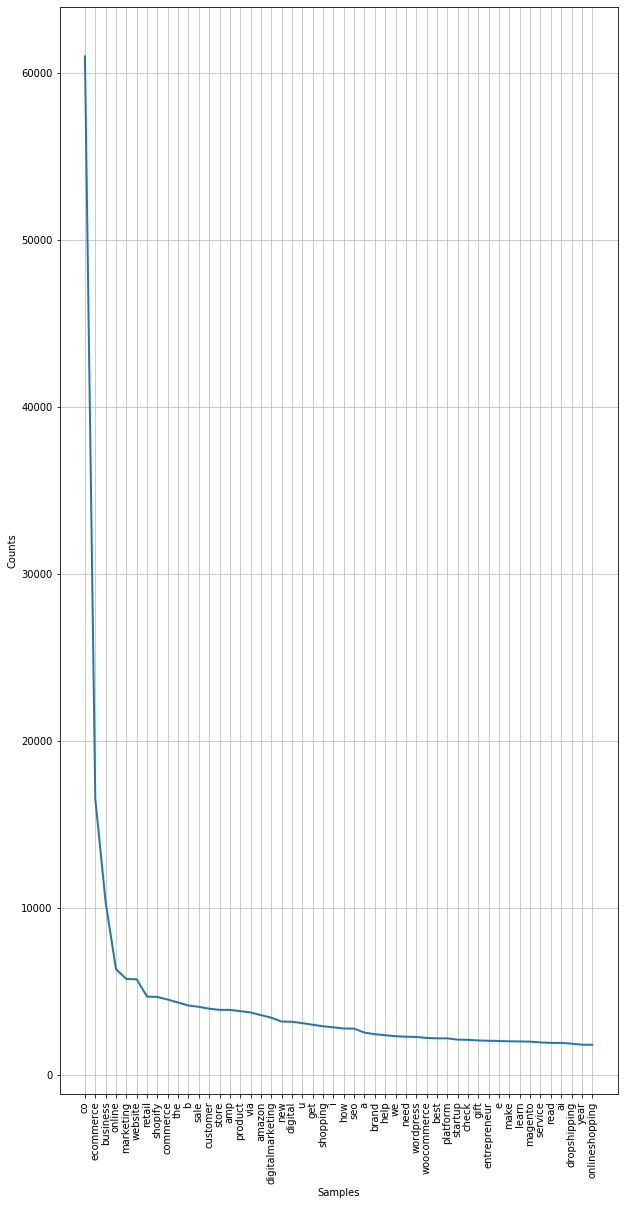

In [154]:
fdist=FreqDist(lemmatized_tweets_e)
plt.figure(figsize=(10,20))
fdist.plot(50)

In [157]:
#list comprehension to get scores from tweets using my written function
c= [analyser.polarity_scores(x) for x in df1['tweet']]

In [158]:
#pulling the relevant score into a list 
d= [x.items() for x in c]

In [159]:
df2=pd.DataFrame(d, columns= ['neg', 'neu', 'pos', 'comp'])

In [160]:
#putting my scores into a column in the dataframe
d = df2['comp']

In [161]:
#making a column that grabs the right compound score to gauge sentiment
df2['comp2']= [score[1] for score in d]

In [162]:
#rounding out my vader score
df2['comp2']= df2['comp2'].round(3)

In [163]:
#converting the vader scores into something easier to manipulate so that I can generate three distinct classes
col         = 'comp2'
conditions  = [ df2[col] >= .150, (df2[col] < .150) & (df2[col]> -.150), df2[col] <= -.150 ]
choices     = [ 1, 0, -1 ]
df2["comp3"] = np.select(conditions, choices, default=np.nan)

In [164]:
df2['comp4']= df2['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [165]:
df3=pd.concat([df1['tweet'], df2], axis=1)

In [169]:
df3.dropna(inplace=True)

In [170]:
df3[df3.comp4=='positive']

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
8,#Magento #JavaScript #skimmer steals payment d...,"(neg, 0.0)","(neu, 0.812)","(pos, 0.188)","(compound, 0.7184)",0.718,1.0,positive
9,The last mile is merely the visible result of ...,"(neg, 0.087)","(neu, 0.716)","(pos, 0.197)","(compound, 0.5423)",0.542,1.0,positive
10,"The rapid adoption of #ecommerce, accelerated ...","(neg, 0.0)","(neu, 0.894)","(pos, 0.106)","(compound, 0.2263)",0.226,1.0,positive
11,"Flycast Media developed a new multiligual, e-c...","(neg, 0.0)","(neu, 0.907)","(pos, 0.093)","(compound, 0.5423)",0.542,1.0,positive
12,"""Trust lust"" fuels #blockchain bet at Alexande...","(neg, 0.0)","(neu, 0.746)","(pos, 0.254)","(compound, 0.802)",0.802,1.0,positive
...,...,...,...,...,...,...,...,...
46153,"In businesses,you put those who will be needin...","(neg, 0.0)","(neu, 0.754)","(pos, 0.246)","(compound, 0.8176)",0.818,1.0,positive
46157,"These features include a moon mode, starburst ...","(neg, 0.0)","(neu, 0.775)","(pos, 0.225)","(compound, 0.7897)",0.790,1.0,positive
46158,"We Just Dropped Some New Products, Our Product...","(neg, 0.0)","(neu, 0.797)","(pos, 0.203)","(compound, 0.7269)",0.727,1.0,positive
46160,Get an amazing dropshipping video ad that real...,"(neg, 0.0)","(neu, 0.928)","(pos, 0.072)","(compound, 0.3071)",0.307,1.0,positive


In [171]:
df3[df3.comp4=='negative']

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
7,How Niche Communities Are Changing Online Conv...,"(neg, 0.108)","(neu, 0.784)","(pos, 0.108)","(compound, -0.25)",-0.250,-1.0,negative
39,Site Launch Checklist Tutorial | Squarespace 7...,"(neg, 0.223)","(neu, 0.777)","(pos, 0.0)","(compound, -0.5129)",-0.513,-1.0,negative
67,3 Exciting Benefits #eCommerce #Websites Can G...,"(neg, 0.125)","(neu, 0.875)","(pos, 0.0)","(compound, -0.6114)",-0.611,-1.0,negative
156,Takes shared #hosting to the next level with H...,"(neg, 0.131)","(neu, 0.869)","(pos, 0.0)","(compound, -0.3412)",-0.341,-1.0,negative
228,"From social to #AI, here are three emerging #e...","(neg, 0.094)","(neu, 0.86)","(pos, 0.046)","(compound, -0.3197)",-0.320,-1.0,negative
...,...,...,...,...,...,...,...,...
46039,Enhance your E-commerce store performance with...,"(neg, 0.201)","(neu, 0.722)","(pos, 0.077)","(compound, -0.5413)",-0.541,-1.0,negative
46083,What shoppers see on your homepage influences ...,"(neg, 0.207)","(neu, 0.793)","(pos, 0.0)","(compound, -0.5719)",-0.572,-1.0,negative
46096,Prestashop 1.7 theme foliage creative #ecommer...,"(neg, 0.076)","(neu, 0.924)","(pos, 0.0)","(compound, -0.4019)",-0.402,-1.0,negative
46120,Do you need a FREE #ecommerce store to start y...,"(neg, 0.142)","(neu, 0.789)","(pos, 0.068)","(compound, -0.34)",-0.340,-1.0,negative


In [172]:
df3[df3.comp4=='neutral']

,tweet,neg,neu,pos,comp,comp2,comp3,comp4
0,5 Biggest eCommerce Challenges and How to Over...,"(neg, 0.0)","(neu, 0.915)","(pos, 0.085)","(compound, 0.0772)",0.077,0.0,neutral
1,Are your new financial year and strategic proj...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
3,Top Reasons to Choose WooCommerce for Your eCo...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
13,Shipping Support Are unpredictable #shipping ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
20,Dive into the hottest marketing strategies in ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
...,...,...,...,...,...,...,...,...
46148,Looking for inspiration on #ecommerce content ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
46154,16 August 2016 #DigitalMarketing #OnlineShoppi...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
46155,Namogoo solution delivers the optimum promotio...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
46156,Today I learned that instant lawn costs a lot ...,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
